In [2]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import csv
import StringIO
import requests
import zipfile
from scipy import stats

%pylab inline

#if os.getenv ('PUI2016') is None:
    #print ("Must set env variable PUI2016")
#if os.getenv ('PUIDATA') is None:
    #print ("Must set env variable PUI2016")

import os
import json
#s = json.load( open(os.getenv('PUI2016') + "/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


In [4]:
PUI2016 = os.getenv('PUI2016')

# Idea:
Citi Bikes are used to commute.

# Null Hypothesis:
The average number of trips during the weekdays is the same or less than the average number of trips on the weekend days. 

H0: average trip count on Monday, Tuesday, Wednesday, Thursday, and Friday <= average trip count on Saturday and Sunday


# Alternative Hypothesis:
The average number of trips during the weekdays is greater than the average number of trips on the weekend days. 

H0: average trip count on Monday, Tuesday, Wednesday, Thursday, and Friday > average trip count on Saturday and Sunday

# Significance Level:
I choose a significance level of .05, meaning I want the probability of getting a result as significant as mine to be less than 5%. 

In [5]:
#http://stackoverflow.com/questions/18885175/read-a-zipped-file-as-a-pandas-dataframe
#http://stackoverflow.com/questions/9419162/python-download-returned-zip-file-from-url
#add component about 'if file already exists, don't recreate it'
datestring = '201603'
r = requests.get("https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip") 
z = zipfile.ZipFile(StringIO.StringIO(r.content))
citi_csv = z.extractall(PUI2016)
citi_df = pd.read_csv(PUI2016 + "/" + datestring + "-citibike-tripdata.csv")
citi_df.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1491,3/1/2016 06:52:42,3/1/2016 07:17:33,72,W 52 St & 11 Ave,40.767272,-73.993929,427,Bus Slip & State St,40.701907,-74.013942,23914,Subscriber,1982.0,1
1,1044,3/1/2016 07:05:50,3/1/2016 07:23:15,72,W 52 St & 11 Ave,40.767272,-73.993929,254,W 11 St & 6 Ave,40.735324,-73.998004,23697,Subscriber,1978.0,1
2,714,3/1/2016 07:15:05,3/1/2016 07:26:59,72,W 52 St & 11 Ave,40.767272,-73.993929,493,W 45 St & 6 Ave,40.756800,-73.982912,21447,Subscriber,1960.0,2
3,329,3/1/2016 07:26:04,3/1/2016 07:31:34,72,W 52 St & 11 Ave,40.767272,-73.993929,478,11 Ave & W 41 St,40.760301,-73.998842,22351,Subscriber,1986.0,1
4,1871,3/1/2016 07:31:30,3/1/2016 08:02:41,72,W 52 St & 11 Ave,40.767272,-73.993929,151,Cleveland Pl & Spring St,40.722104,-73.997249,20985,Subscriber,1978.0,1
5,859,3/1/2016 07:33:46,3/1/2016 07:48:06,72,W 52 St & 11 Ave,40.767272,-73.993929,520,W 52 St & 5 Ave,40.759923,-73.976485,15557,Subscriber,1975.0,1
6,538,3/1/2016 07:36:31,3/1/2016 07:45:29,72,W 52 St & 11 Ave,40.767272,-73.993929,533,Broadway & W 39 St,40.752996,-73.987216,22638,Subscriber,1993.0,1
7,1255,3/1/2016 07:38:14,3/1/2016 07:59:10,72,W 52 St & 11 Ave,40.767272,-73.993929,426,West St & Chambers St,40.717548,-74.013221,23864,Subscriber,1988.0,2
8,1216,3/1/2016 07:57:05,3/1/2016 08:17:21,72,W 52 St & 11 Ave,40.767272,-73.993929,325,E 19 St & 3 Ave,40.736245,-73.984738,17821,Subscriber,1982.0,1
9,280,3/1/2016 08:01:30,3/1/2016 08:06:11,72,W 52 St & 11 Ave,40.767272,-73.993929,500,Broadway & W 51 St,40.762288,-73.983362,21458,Subscriber,1982.0,1


In [6]:
citi_df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [10]:
times_duration = citi_df.drop(citi_df.columns[2:], axis=1)
times_duration.head()

,tripduration,starttime
0,1491,3/1/2016 06:52:42
1,1044,3/1/2016 07:05:50
2,714,3/1/2016 07:15:05
3,329,3/1/2016 07:26:04
4,1871,3/1/2016 07:31:30


In [12]:
times_duration['date'] = pd.to_datetime(times_duration['starttime'],  format="%m/%d/%Y %H:%M:%S")
times_duration['weekday'] = times_duration['date'].apply(lambda x: x.weekday())

In [13]:
times_duration.head()

,tripduration,starttime,date,weekday
0,1491,3/1/2016 06:52:42,2016-03-01 06:52:42,1
1,1044,3/1/2016 07:05:50,2016-03-01 07:05:50,1
2,714,3/1/2016 07:15:05,2016-03-01 07:15:05,1
3,329,3/1/2016 07:26:04,2016-03-01 07:26:04,1
4,1871,3/1/2016 07:31:30,2016-03-01 07:31:30,1


In [14]:
count = times_duration['date'].groupby([times_duration['date'].dt.weekday]).count()
print(count)

date
0     89181
1    163604
2    178419
3    176546
4    124308
5    102320
6     85543
Name: date, dtype: int64


In [15]:
times_duration['toplot'] = times_duration['date'].groupby([times_duration['date'].dt.weekday]).count()

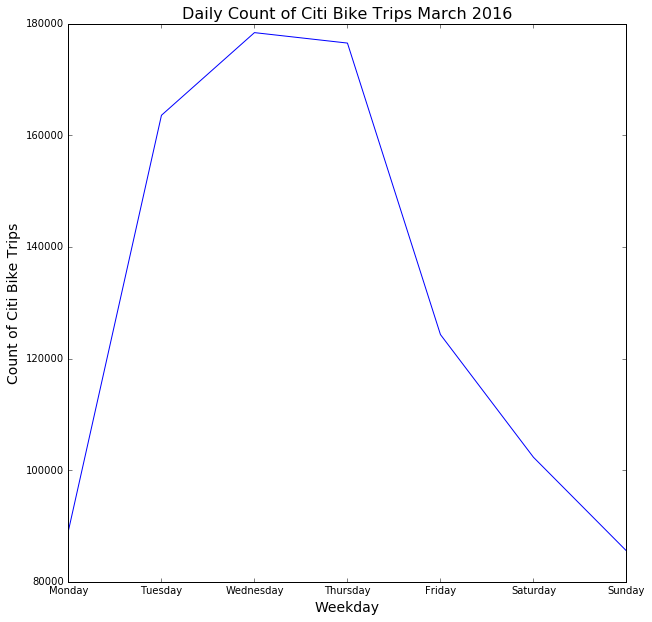

In [23]:
fig = figsize(10, 10)
x = [0, 1, 2, 3, 4, 5, 6]
pl.plot(times_duration['toplot'])
xticks = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pl.xticks(x, xticks)
xlabel('Weekday', fontsize=14)
ylabel('Count of Citi Bike Trips', fontsize=14)
title('Daily Count of Citi Bike Trips March 2016', fontsize=16)

In [10]:
weekday = 0
weekend = 0

for elem in times_duration['weekday']:
    if elem < 5:
        weekday += 1
    if elem >= 5:
        weekend += 1
print(weekday)
print(weekend)

732058
187863


In [11]:
weekday_mean = weekday / 23
weekend_mean = weekend / 8
print(weekday_mean)
print(weekend_mean)

31828.6086957
23482.875


In [13]:
times_duration.set_index(times_duration['date'], inplace=True)
times_duration.head()

,tripduration,starttime,stoptime,start station id,date,weekday
date,,,,,,
2016-03-01 06:52:42,1491,3/1/2016 06:52:42,3/1/2016 07:17:33,72,2016-03-01 06:52:42,1
2016-03-01 07:05:50,1044,3/1/2016 07:05:50,3/1/2016 07:23:15,72,2016-03-01 07:05:50,1
2016-03-01 07:15:05,714,3/1/2016 07:15:05,3/1/2016 07:26:59,72,2016-03-01 07:15:05,1
2016-03-01 07:26:04,329,3/1/2016 07:26:04,3/1/2016 07:31:34,72,2016-03-01 07:26:04,1
2016-03-01 07:31:30,1871,3/1/2016 07:31:30,3/1/2016 08:02:41,72,2016-03-01 07:31:30,1


In [62]:
trip_count = times_duration.groupby(times_duration.index.date).count()

In [63]:
trip_count = trip_count.drop(['starttime', 'stoptime', 'start station id', 'date', 'weekday'], axis=1)
trip_count['trip_count'] = trip_count['tripduration']
trip_count.drop(['tripduration'], axis=1)
trip_count.head()

,tripduration,trip_count
2016-03-01,30509,30509
2016-03-02,26195,26195
2016-03-03,24061,24061
2016-03-04,17369,17369
2016-03-05,18023,18023


In [64]:
trip_count = trip_count.drop(['tripduration'], axis=1)
trip_count.head()

,trip_count
2016-03-01,30509
2016-03-02,26195
2016-03-03,24061
2016-03-04,17369
2016-03-05,18023


In [65]:
trip_count['date'] = trip_count.index

In [66]:
trip_count['weekday'] = trip_count['date'].apply(lambda x: x.weekday())

In [67]:
trip_count

,trip_count,date,weekday
2016-03-01,30509,2016-03-01,1
2016-03-02,26195,2016-03-02,2
2016-03-03,24061,2016-03-03,3
2016-03-04,17369,2016-03-04,4
2016-03-05,18023,2016-03-05,5
2016-03-06,18832,2016-03-06,6
2016-03-07,31492,2016-03-07,0
2016-03-08,36521,2016-03-08,1
2016-03-09,41490,2016-03-09,2
2016-03-10,42252,2016-03-10,3


In [73]:
weekday_trips = [30509, 26195, 24061, 17369, 31492, 36521, 41490, 42252, 38195, 10930, 31596, 36067, 35390, 34647, 26414, 33497, 40983, 36495, 34097, 20345, 31481, 33684, 38348]
weekend_trips = [18023, 18832, 32771, 27550, 24048, 16678, 27478, 22483]

In [75]:
ttest = stats.ttest_ind(weekday_trips, weekend_trips)
print(ttest)

Ttest_indResult(statistic=2.7532815087616918, pvalue=0.010075139302255036)


In [76]:
#weekdays_list = []
#trip_list = []

#for elem in trip_count['trip_count']:
    #trip_list.append(elem)
    
#for elem in trip_count['weekday']:
    #weekdays.append(elem)

### T-test results: 
Because the p-value is less than the .05 significance level, I can reject the null hypothesis stating that the average number of Citi Bike trips on the weekdays is the same or less than the average number of trips on the weekends. 